In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np

In [ ]:
def relu(x):
    return np.maximum(0,x)
def drelu(x):
    return x>=0
n=5 # number of samples
d=2 # dimension of the data
beta=1e-3
m=50 # number of neurons
num_trials = 10
num_epochs = 50
learning_rate = 0.01
optimal_loss = 0.06956456608678105

In [ ]:
# 2. Define the Neural Network model with 2 layers
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)  # First layer
        self.layer2 = nn.Linear(hidden_dim, output_dim)  # Second layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # ReLU activation function applied after the first layer
        x = self.layer2(x)  # Output layer (no activation)
        return x

In [ ]:
# 3. Set dimensions
input_dim = 2   # 2D input
hidden_dim = m  # Hidden layer dimension (you can tune this)
output_dim = 1  # 1D output (binary classification)

In [ ]:
# 4. Define Mean Squared Error (MSE) loss and add weight decay (L2 regularization)
criterion = nn.MSELoss()

In [ ]:
# Store losses for each trial
all_losses = []


In [ ]:
# Track the loss values for plotting

for trial in range(num_trials):
    # 1. Generate random dataset with n samples
    X = torch.rand(n, 2) * 5 - 5 # Random 2D input in range [-5, 5)
    # Create Y based on the first element of each row in X
    #Y = torch.where(X[:, 0] > 0, torch.tensor(1), torch.tensor(-1))
    Y = torch.where(X[:, 0] > X[:,1], torch.tensor(1), torch.tensor(-1))
    X = X.float()
    Y = Y.float()
    # Set random seed for reproducibility
    torch.manual_seed(trial)
    np.random.seed(trial)

    # Initialize model and optimizer
    model = SimpleNN(input_dim, hidden_dim, output_dim)
    # Using SGD optimizer with weight decay
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=beta)  # weight_decay is the L2 penalty
    # Training loop
    trial_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        trial_losses.append(loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()))
        # Optionally print loss every 100 epochs
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()):.4f}')

    all_losses.append(trial_losses)

Epoch [10/50], Loss: 0.6933
Epoch [20/50], Loss: 0.6806
Epoch [30/50], Loss: 0.6727
Epoch [40/50], Loss: 0.6673
Epoch [50/50], Loss: 0.6636
Epoch [10/50], Loss: 0.6830
Epoch [20/50], Loss: 0.6644
Epoch [30/50], Loss: 0.6600
Epoch [40/50], Loss: 0.6584
Epoch [50/50], Loss: 0.6574
Epoch [10/50], Loss: 0.9802
Epoch [20/50], Loss: 0.9735
Epoch [30/50], Loss: 0.9727
Epoch [40/50], Loss: 0.9726
Epoch [50/50], Loss: 0.9725
Epoch [10/50], Loss: 1.0712
Epoch [20/50], Loss: 1.0259
Epoch [30/50], Loss: 1.0024
Epoch [40/50], Loss: 0.9891
Epoch [50/50], Loss: 0.9816
Epoch [10/50], Loss: 0.9932
Epoch [20/50], Loss: 0.9844
Epoch [30/50], Loss: 0.9817
Epoch [40/50], Loss: 0.9801
Epoch [50/50], Loss: 0.9788
Epoch [10/50], Loss: 0.9807
Epoch [20/50], Loss: 0.9750
Epoch [30/50], Loss: 0.9746
Epoch [40/50], Loss: 0.9744
Epoch [50/50], Loss: 0.9743
Epoch [10/50], Loss: 0.9747
Epoch [20/50], Loss: 0.9731
Epoch [30/50], Loss: 0.9725
Epoch [40/50], Loss: 0.9721
Epoch [50/50], Loss: 0.9717
Epoch [10/50], Loss:

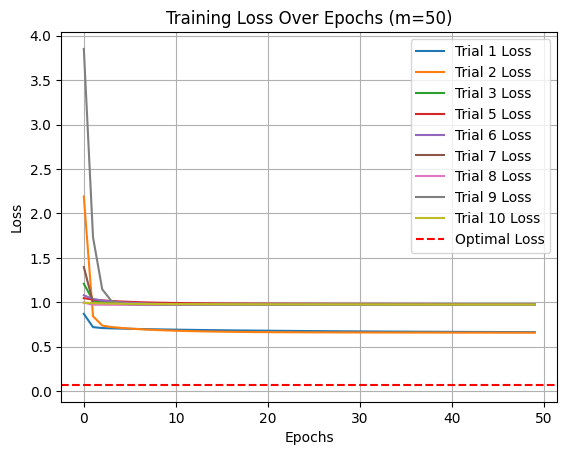

In [ ]:
# 6. Plot the loss over the number of epochs
for trial in range(num_trials-7):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
for trial in range(num_trials-6,num_trials):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training Loss Over Epochs (m={m})')
# Plot a horizontal line indicating the optimal value
plt.axhline(y=optimal_loss, color='r', linestyle='--', label=f'Optimal Loss')
plt.grid(True)

# Display the legend
plt.legend(loc='upper right')

# Save the plot
#plt.savefig('losses_plot.png')

plt.show()